## Análisis de resultados.
En esta hoja de notas queremos comparar los resultados extraidos del DR3 de los obtenidos en el DR2 en el trabajo 
[Baumgardt et al., 2019](https://drive.google.com/file/d/1VtDW8WacV4sDh1wr_FGPmesjclg6zdbZ/view)

## Requirements

In [34]:
%load_ext autoreload
%autoreload 2


#@markdown ### Librerías y funciones auxiliares
import sys
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astroquery.vizier import Vizier
from dotenv import load_dotenv
from google.cloud import storage

# Añadir el directorio raíz del proyecto al sys.path
project_path = os.path.abspath(os.path.join(os.getcwd(), "../src"))  # Subir un nivel
if project_path not in sys.path:
    sys.path.append(project_path)

from hyper_velocity_stars_detection.sources.catalogs import GaiaDR3, GaiaDR2, GaiaFPR

PATH = "../data/globular_clusters"
#SELECTED_CLUSTERS = read_catalog_file(os.path.join(PATH, "mwgc.dat.txt"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
ra = 6.02233
dec = -72.08144
radius = 1/60
row_limit = 50

df_data = GaiaFPR().download_data(ra, dec, radius, row_limit)

df_data

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


,solution_id,designation,region_name,source_id,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,phot_g_flux_mad,phot_g_flux_first_quartile,phot_g_flux_third_quartile,phot_g_flux_min,phot_g_flux_max,phot_proc_mode,l,b,ecl_lon,ecl_lat


In [38]:
df_data.columns

Index(['solution_id', 'designation', 'region_name', 'source_id', 'ref_epoch',
       'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error',
       'parallax_over_error', 'pm', 'pmra', 'pmra_error', 'pmdec',
       'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr',
       'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'n_scans', 'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al',
       'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_params_solved',
       'pseudocolour', 'pseudocolour_error', 'ra_pseudocolour_corr',
       'dec_pseudocolour_corr', 'parallax_pseudocolour_corr',
       'pmra_pseudocolour_corr', 'pmdec_pseudocolour_corr',
       'astrometric_matched_transits', 'visibility_periods_used',
       'astrometric_s

In [12]:
df_data.shape

(982, 152)

In [3]:
CLUSTER_NAME = "ngc 104"


cluster = AstroObject.get_object(CLUSTER_NAME)
cluster

AstroObject(name='ngc 104', main_id='NGC_104', info=<Table length=1>
 MAIN_ID     RA      DEC    ... GALDIM_ANGLE SCRIPT_NUMBER_ID ANGULAR_SIZE
            deg      deg    ...     deg                          arcmin   
  object  float64  float64  ...    int16          int32         float32   
--------- ------- --------- ... ------------ ---------------- ------------
NGC   104 6.02233 -72.08144 ...            0                1         43.8, coord=<SkyCoord (ICRS): (ra, dec) in deg
    (6.02232917, -72.08144444)>, data=NOTHING, file=NOTHING)

In [4]:
df_data = cluster.download_object("gaiadr3")
df_data

,solution_id,DESIGNATION,SOURCE_ID,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot
0,1636148068921376768,Gaia DR3 4689621262329503744,4689621262329503744,117828161,2016.0,5.934553,0.537742,-72.252166,0.742929,-2.907118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,1636148068921376768,Gaia DR3 4689859169153623936,4689859169153623936,661937160,2016.0,6.723713,0.234891,-71.538202,0.198667,-0.215250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,1636148068921376768,Gaia DR3 4688774599718360192,4688774599718360192,652526373,2016.0,5.743721,0.156241,-72.805367,0.141372,0.031388,...,0.0107,0.0025,0.0266,0.0086,0.002,0.0213,0.0047,0.0011,0.0116,MARCS
3,1636148068921376768,Gaia DR3 4688774599718361088,4688774599718361088,249488762,2016.0,5.713389,0.453006,-72.804549,0.428129,-1.306793,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4,1636148068921376768,Gaia DR3 4688774599718363008,4688774599718363008,336417481,2016.0,5.735411,0.206701,-72.802089,0.182867,-0.637711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184934,1636148068921376768,Gaia DR3 4689629985430016512,4689629985430016512,196543525,2016.0,6.828311,2.468688,-72.078526,1.134871,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
184935,1636148068921376768,Gaia DR3 4689629985432578560,4689629985432578560,1022114443,2016.0,6.839266,0.203694,-72.074864,0.158569,0.000232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
184936,1636148068921376768,Gaia DR3 4689629985432588288,4689629985432588288,93684263,2016.0,6.832372,1.853926,-72.069998,1.529677,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
184937,1636148068921376768,Gaia DR3 4689629989704549888,4689629989704549888,1229703459,2016.0,6.847079,1.082456,-72.065732,0.820332,1.939339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [8]:
df_data.columns.tolist()

['solution_id',
 'DESIGNATION',
 'SOURCE_ID',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pm',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_bad_obs_al',
 'astrometric_gof_al',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_params_solved',
 'astrometric_primary_flag',
 'nu_eff_used_in_astrometry',
 'pseudocolour',
 'pseudocolour_error',
 'ra_pseudocolour_corr',
 'dec_pseudocolour_corr',
 'parallax_pseudocolour_corr',
 'pmra_pseudocolour_corr',
 'pmdec_pseudocolour_corr',
 'astrometric_matched_transits',
 'visibility_periods_used',
 'astrometric_sigma5d_max

In [23]:
df_data.ipd_frac_multi_peak.describe()

count    184939.000000
mean          4.371144
std          12.272369
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         100.000000
Name: ipd_frac_multi_peak, dtype: float64

In [25]:

filter_0 = df_data.astrometric_params_solved > 3
filter_1 = df_data.ruwe < 1.4
filter_2 = df_data.visibility_periods_used > 10
filter_3 = df_data.ipd_gof_harmonic_amplitude < 0.15
filter_4 = df_data.ipd_frac_multi_peak < 10

mask_filters = (
    filter_0 &
    filter_1 &
    filter_2 &
    filter_3 &
    filter_4
)

df_data[mask_filters].shape[0] / df_data.shape[0]

0.6954725612228897

0.0907975062047486


<Axes: xlabel='l', ylabel='b'>

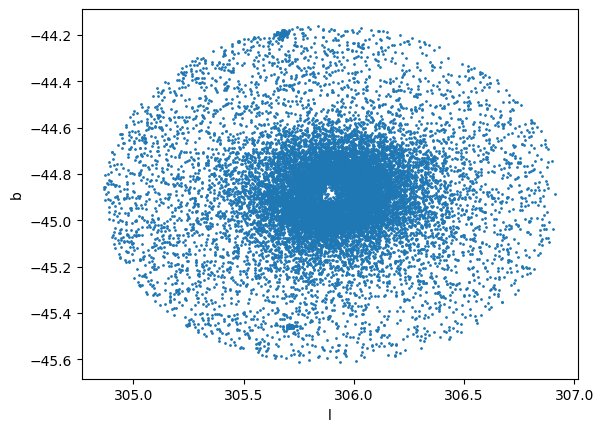

In [51]:

filter_pm = (df_data.pmra_error < 0.10) & (df_data.pmdec_error < 0.10)
filter_parallax = (df_data.parallax_error < 0.10)

selected_data = df_data[mask_filters & filter_pm & filter_parallax]
print(selected_data.shape[0] / df_data.shape[0])
selected_data.plot.scatter(x="l", y="b", s=1)

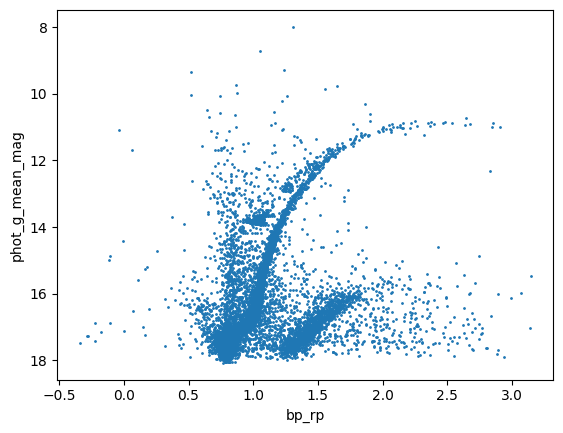

In [49]:
df_data.phot_g_mean_mag
ax = selected_data.plot.scatter(x="bp_rp", y="phot_g_mean_mag", s=1)
ax.yaxis.set_inverted(True)

In [55]:
catalogs

Empty TableList

In [60]:
# J., 787, 89
catalog = "J/ApJ/751/55"

v = Vizier(columns=["**"])
v.ROW_LIMIT = -1
catalogs = v.get_catalogs([catalog])
df_hvs = catalogs[0].to_pandas()
df_hvs

,recno,Type,HVS,HRV,Vrf,T,gmag0,gMag,Dist,GLON,GLAT,Name,Ref,B,DR6-9,Sloan,Simbad,_RA,_DE
0,1,HVSs,1,840,673,T,19.690001,0.41,76,227.330002,31.330000,SDSS J090744.99+024506.88,1,2,DR6-9,Sloan,Simbad,136.93748,2.75192
1,2,HVSs,2,708,718,T,19.049999,2.60,26,175.990005,47.049999,US708,2,2,DR6-9,Sloan,Simbad,143.33687,44.28494
2,3,HVSs,3,723,520,T,16.200001,-2.70,62,263.040009,-40.910000,HE0437-5439,3,2,DR6-9,Sloan,Simbad,69.55321,-54.55331
3,4,HVSs,4,611,559,T,18.309999,-0.66,69,194.759995,42.560001,SDSS J091301.01+305119.83,4,3,DR6-9,Sloan,Simbad,138.25418,30.85553
4,5,HVSs,5,553,664,T,17.559999,0.04,36,146.229996,38.700001,SDSS J091759.47+672238.35,4,3,DR6-9,Sloan,Simbad,139.49774,67.37741
5,6,HVSs,6,626,511,T,18.969999,0.10,61,243.119995,59.560001,SDSS J110557.45+093439.47,5,3,DR6-9,Sloan,Simbad,166.48937,9.57762
6,7,HVSs,7,529,396,T,17.639999,-0.19,37,263.829987,57.950001,SDSS J113312.12+010824.87,5,3,DR6-9,Sloan,Simbad,173.30052,1.14024
7,8,HVSs,8,489,393,T,17.940001,0.01,46,211.699997,46.330002,SDSS J094214.03+200322.07,6,2,DR6-9,Sloan,Simbad,145.55846,20.05612
8,9,HVSs,9,628,461,T,18.639999,0.34,47,244.630005,44.380001,SDSS J102137.08-005234.77,6,2,DR6-9,Sloan,Simbad,155.40454,-0.87632
9,10,HVSs,10,478,423,T,19.219999,0.21,66,249.929993,75.720001,SDSS J120337.85+180250.35,6,2,DR6-9,Sloan,Simbad,180.90772,18.04732


## Resultados DR3

In [2]:

cluster = [cl for cl in SELECTED_CLUSTERS if cl.name == CLUSTER_NAME][0]
project = load_project(cluster_name=cluster.name, project_id = os.getenv("PROJECT_ID"), bucket_name=os.getenv("BUCKET"),path=PATH)
print(str(project))

Las muestras analizadas de ngc 104 son:
Muestras seleccionadas del objeto astronómico ngc 104 con radio 1:
	 - df_1_c0 - Todas las estrellas seleccionadas: 84612.
	 - df_1_c1 - Las estrellas con errores de paralaje y pm menores al 10%: 16654.
	 - df_1_c2 - Las estrellas con un error de paralaje menor del 30% y de pm menores al 10%: 16654.
	 - df_1_c3 - Las estrellas con un error de paralaje menor del 10% y de pm menores al 20%.: 24557.

Muestras seleccionadas del objeto astronómico ngc 104 con radio 6:
	 - df_6_c0 - Todas las estrellas seleccionadas: 5444.
	 - df_6_c1 - Las estrellas con errores de paralaje y pm menores al 10%: 1898.
	 - df_6_c2 - Las estrellas con un error de paralaje menor del 30% y de pm menores al 10%: 1898.
	 - df_6_c3 - Las estrellas con un error de paralaje menor del 10% y de pm menores al 20%.: 2370.

Se han encontrado 37 fuentes de rayos X.
Estimated number of clusters: 3
Estimated number of noise points: 2365
	 - Volumen total del cluster 0: 853.
	 - Volumen 

In [3]:
project.xrsource.results

,mission,main_id,obsid,name,ra,dec,lii,bii,time,exposure,public_date,class,SEARCH_OFFSET_
0,xmmmaster,NaN,679180301,PLCK G305.9-44.6,5.94582,-72.39250,305.86214,-44.57807,55822.030822,11837.0,56038.0,UNIDENTIFIED,"18.716 (6.0223177065,-72.0814425106)\n"
1,chanmaster,NGC_104,6233,47 Tuc,6.02167,-72.08053,305.89580,-44.88999,53737.234387,97930.0,53740.0,SNR,"0.056 (6.0223177065,-72.0814425106)\n"
2,chanmaster,NGC_104,2738,47 TUCANAE,6.02417,-72.08089,305.89465,-44.88975,52558.070775,69860.0,52941.0,X-RAY BINARY,"0.048 (6.0223177065,-72.0814425106)\n"
3,chanmaster,NGC_104,2737,47 TUCANAE,6.02417,-72.08089,305.89465,-44.88975,52549.784803,66110.0,52921.0,X-RAY BINARY,"0.048 (6.0223177065,-72.0814425106)\n"
4,chanmaster,NGC_104,2736,47 TUCANAE,6.02417,-72.08089,305.89465,-44.88975,52547.558657,66110.0,52916.0,X-RAY BINARY,"0.048 (6.0223177065,-72.0814425106)\n"
5,chanmaster,NGC_104,2735,47 TUCANAE,6.02417,-72.08089,305.89465,-44.88975,52546.706898,66100.0,52916.0,X-RAY BINARY,"0.048 (6.0223177065,-72.0814425106)\n"
6,chanmaster,NGC_104,15747,47 Tuc,6.01456,-72.08109,305.89874,-44.88911,56909.814549,55170.0,57421.0,X-RAY BINARY,"0.145 (6.0223177065,-72.0814425106)\n"
7,chanmaster,NGC_104,6236,47 Tuc,6.02167,-72.08053,305.89580,-44.88999,53740.478553,51920.0,53743.0,SNR,"0.056 (6.0223177065,-72.0814425106)\n"
8,chanmaster,NGC_104,5545,47 Tuc,6.02167,-72.08053,305.89580,-44.88999,53727.209653,51870.0,53731.0,SNR,"0.056 (6.0223177065,-72.0814425106)\n"
9,chanmaster,NGC_104,5543,47 Tuc,6.02167,-72.08053,305.89580,-44.88999,53724.623403,51390.0,53726.0,SNR,"0.056 (6.0223177065,-72.0814425106)\n"


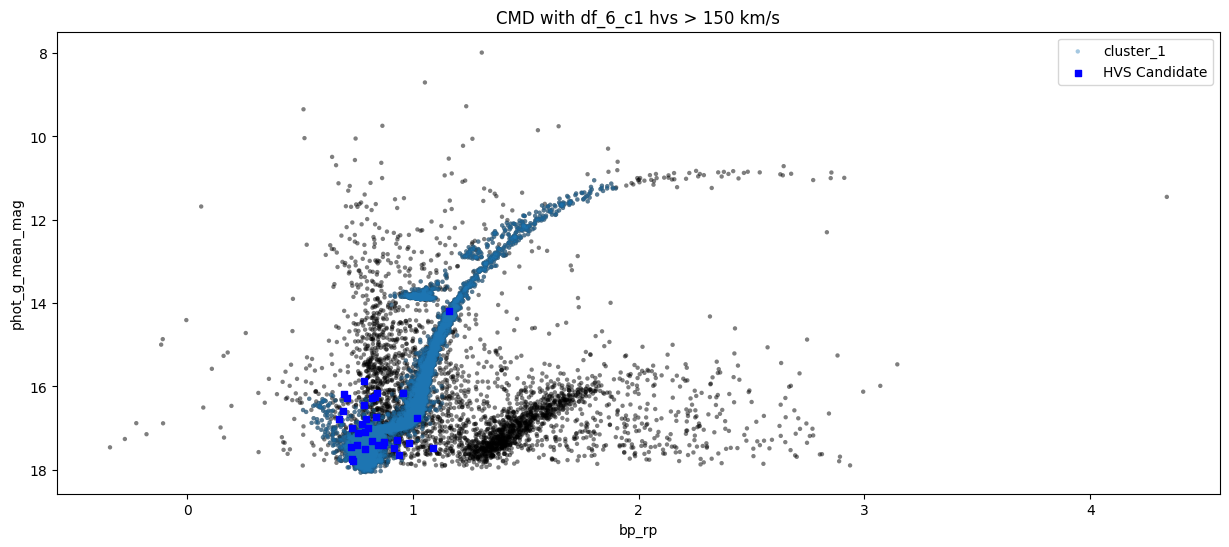

In [3]:
fig, ax = project.plot_cmd(
            hvs_candidates_name="df_6_c1",
            factor_sigma = 1,
            hvs_pm = 150,
            legend=True,
            clusters=project.clustering_results.main_label
)

In [8]:
project.clustering_results.gc.ruwe

20       1.037298
25       1.089733
29       1.027944
50       1.019429
90       0.992457
           ...   
15963    1.048783
15964    1.066863
15965    1.024483
15966    0.957829
15967    1.102966
Name: ruwe, Length: 12734, dtype: float64

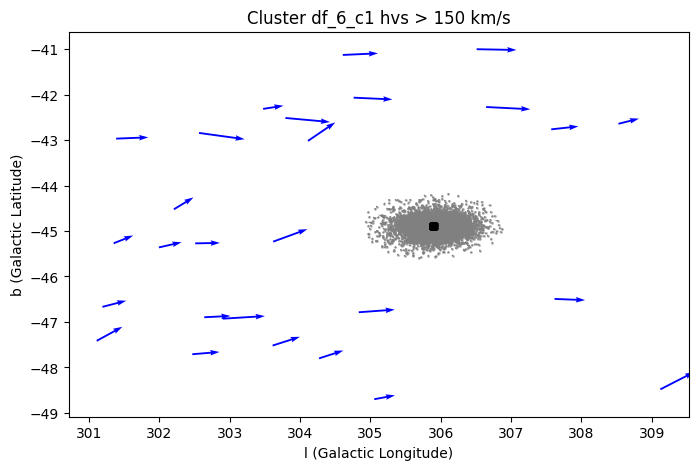

In [4]:
fig, ax = project.plot_cluster(hvs_candidates_name="df_6_c1", factor_sigma=1, hvs_pm=150, legend=False, factor_size=50)

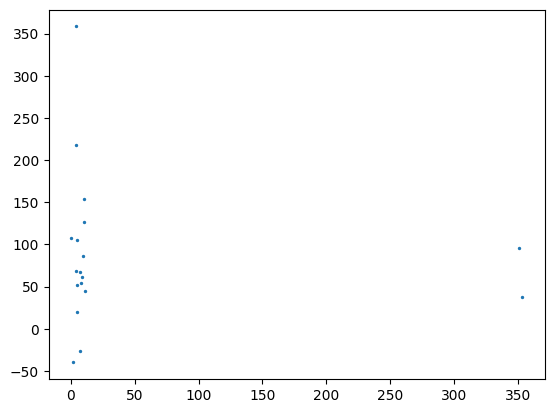

In [5]:
gc = project.clustering_results.remove_outliers_gc(123)
ra_center = project.astro_object.coord.ra.value
dec_center = project.astro_object.coord.dec.value

if not project.xrsource.results.empty:
    ra_center = np.median(project.xrsource.results.ra)
    dec_center =  np.median(project.xrsource.results.dec)

data = project.get_data("df_6_c1")
factor_sigma = 1
parallax_col = "parallax_corrected"
parallax_range = [
            gc[parallax_col].mean() - factor_sigma * gc[parallax_col].std(),
            gc[parallax_col].mean() + factor_sigma * gc[parallax_col].std(),
        ]
mask_p = (data[parallax_col] > parallax_range[0]) & (
            data[parallax_col] < parallax_range[1]
        )
data_selected = data[mask_p]

distance = np.sqrt((ra_center - data_selected.ra.values) ** 2 + (dec_center - data_selected.dec.values) ** 2)

velocity_gc = np.sqrt(gc.pm_kms**2 + gc.radial_velocity**2).mean()

velocity = np.sqrt(data_selected.pm_kms**2 + data_selected.radial_velocity**2) - velocity_gc

plt.scatter(distance, velocity, s=2)

(array([2., 4., 2., 0., 5., 1., 0., 1., 1., 2.]),
 array([-127.09436257,  -86.51215722,  -45.92995187,   -5.34774653,
          35.23445882,   75.81666416,  116.39886951,  156.98107486,
         197.5632802 ,  238.14548555,  278.72769089]),
 <BarContainer object of 10 artists>)

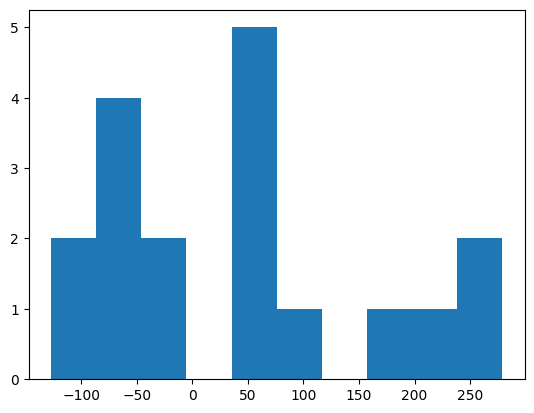

In [66]:
def v_rest_frame(v, l, b) -> float:
    return v + 11.1 * np.cos(l) * np.cos(b) + 247.24 * np.sin(l) * np.cos(b) + 7.25 * np.sin(b)

plt.hist(v_rest_frame(data_selected.radial_velocity, data.l, data.b))

(array([2., 2., 6., 4., 2., 0., 1., 0., 0., 1.]),
 array([-161.6924756 , -121.85956286,  -82.02665012,  -42.19373738,
          -2.36082463,   37.47208811,   77.30500085,  117.13791359,
         156.97082633,  196.80373908,  236.63665182]),
 <BarContainer object of 10 artists>)

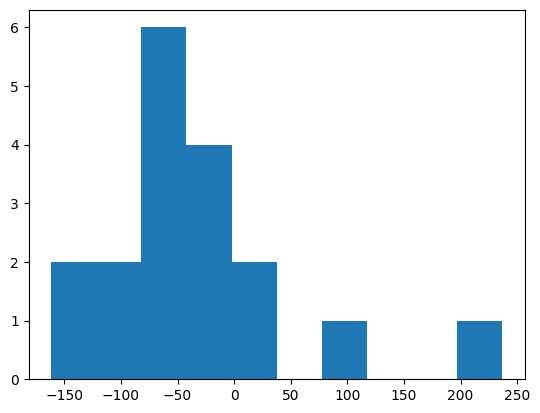

In [68]:
plt.hist(velocity - velocity_gc)

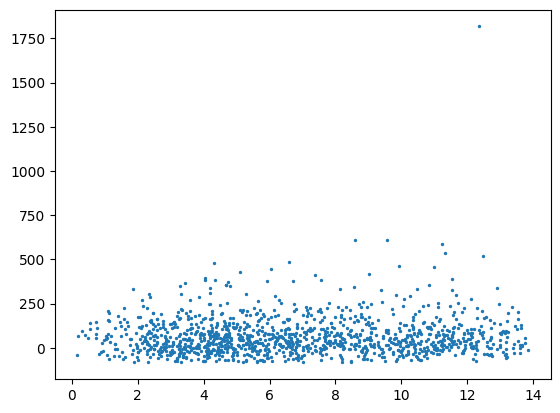

In [51]:
data = project.get_data("df_6_c0")
factor_sigma = 1
fov = 2/3600 # debe estar en grados
parallax_col = "parallax_corrected"
parallax_range = [
            gc[parallax_col].mean() - factor_sigma * gc[parallax_col].std(),
            gc[parallax_col].mean() + factor_sigma * gc[parallax_col].std(),
        ]
mask_p = (data[parallax_col] > parallax_range[0]) & (
            data[parallax_col] < parallax_range[1]
        )
distance_ra = np.abs(ra_center - data.ra.values)
distance_ra[distance_ra>180] = 360 - distance_ra[distance_ra>180]

mask_d = (distance_ra <= fov) & (np.abs(data.dec - dec_center) <= fov)
data_selected = data[mask_p]

distance_ra = np.abs(ra_center - data_selected.ra.values)
distance_ra[distance_ra>180] = 360 - distance_ra[distance_ra>180]

distance = np.sqrt(distance_ra ** 2 + (dec_center - data_selected.dec.values) ** 2)

velocity_gc = np.sqrt(gc.pm_kms**2 + gc.radial_velocity**2).mean()

velocity = np.sqrt(data_selected.pm_kms**2 + data_selected.radial_velocity**2) - velocity_gc

plt.scatter(distance, data_selected.pm_kms - gc.pm_kms.mean(), s=2)

### Descarga de datos más cercanos a la fuente

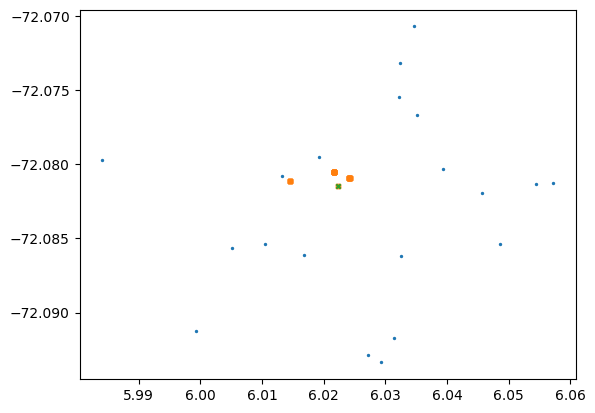

In [16]:
astro_object = AstroObject.get_object("ngc 104")
radius_scale=1/60
results = astro_object.download_object("gaiadr3", radius_scale=radius_scale, return_data=True)
results = results[results.ruwe < 1.4]
plt.scatter(results.ra, results.dec, s=2)
mask_x = (project.xrsource.results.exposure > 0) & (project.xrsource.results.main_id == project.name)
plt.scatter(
    project.xrsource.results.ra[mask_x],
    project.xrsource.results.dec[mask_x],
    s=10, marker="s")
plt.scatter(astro_object.info["RA"].value, astro_object.info["DEC"].value, s=10, marker="x")

In [17]:
results.ra

2      5.984061
39     6.027121
40     6.031466
51     6.029231
71     6.032486
78     6.045640
79     6.048647
97     6.039325
106    6.010530
113    5.999296
164    6.005122
172    6.016761
200    6.054387
212    6.057204
236    6.019319
237    6.034694
238    6.035200
265    6.032455
310    6.013260
395    6.032291
Name: ra, dtype: float64